In [1]:
# Environment check: python executable and key package versions
import sys
print('python executable:', sys.executable)
print('python version:', sys.version)

try:
    import pandas as pd
    print('pandas:', pd.__version__)
except Exception as e:
    print('pandas import error:', e)

try:
    import numpy as np
    print('numpy:', np.__version__)
except Exception as e:
    print('numpy import error:', e)

try:
    import matplotlib
    print('matplotlib:', matplotlib.__version__)
except Exception as e:
    print('matplotlib import error:', e)

try:
    import seaborn as sns
    print('seaborn:', sns.__version__)
except Exception as e:
    print('seaborn import error:', e)

try:
    import sklearn
    print('scikit-learn:', sklearn.__version__)
except Exception as e:
    print('scikit-learn import error:', e)

python executable: /Users/mengsrun/Desktop/scraper/.venv/bin/python
python version: 3.12.5 (v3.12.5:ff3bc82f7c9, Aug  7 2024, 05:32:06) [Clang 13.0.0 (clang-1300.0.29.30)]
pandas: 2.3.3
numpy: 2.3.4
matplotlib: 3.10.7
seaborn: 0.13.2
scikit-learn: 1.7.2


In [2]:
# Working directory and files listing
import os
from pathlib import Path
print('cwd:', os.getcwd())
print('\nfiles in cwd:')
for f in sorted(Path.cwd().iterdir()):
    print(f.name)

cwd: /Users/mengsrun/Desktop/scraper/Google Pixel/Pixel_Model/pixel_base

files in cwd:
outputs
pixel_10_only.csv
pixel_6_only.csv
pixel_7_only.csv
pixel_8_only.csv
pixel_9_only.csv
pixel_base.csv
pixel_base.ipynb


In [ ]:
import re
import pandas as pd

pixel6 = pd.read_csv('pixel_6_only.csv')

# Step 1: Remove rows with '|' (multiple model options)
pixel6 = pixel6[~pixel6['Title'].str.contains(r'\|', regex=True, na=False)]

# Step 2: Remove titles that list multiple models like "6 - 6 Pro" or "7a / 7 / 7 Pro"
pattern_multi = r'\b(?:[1-9][0-9]?)\b\s*[-/|]\s*\b(?:[1-9][0-9]?)(?:\s*(?:Pro|XL|a))?\b'
pixel6 = pixel6[~pixel6['Title'].str.contains(pattern_multi, flags=re.IGNORECASE, na=False)]

# Step 3: Keep only "Pixel 6" and NOT "6 Pro", "6 XL", "6a", etc.
pixel6 = pixel6[
    pixel6['Title'].str.contains(r'\bPixel\s*6\b', flags=re.IGNORECASE, na=False)
    & ~pixel6['Title'].str.contains(r'\b6\s*(?:Pro|XL|a)\b', flags=re.IGNORECASE, na=False)
]


# Preview
pixel6.head()


,Page,Title,Price,Sold Date,Link,Image Link,Storage,Condition,PartsOnly,Model,Pixel_6
4,1,Google Pixel 6 5G UW 256GB G9S9B Verizon/Unloc...,$195.49,2025-07-23,https://www.ebay.com/itm/267327711422,https://i.ebayimg.com/images/g/9FQAAOSwxOBicD9...,256 GB,Excellent,False,Pixel 6,True
7,1,Google Pixel 6 128GB GB7N6 CDMA/GSM Unlocked S...,$161.49,2025-10-18,https://www.ebay.com/itm/267187173848,https://i.ebayimg.com/images/g/9FQAAOSwxOBicD9...,128 GB,Excellent,False,Pixel 6,True
8,1,"Unlocked Google Pixel 6 GA02910-US 6.4"" 128GB ...",$129.99,2025-10-17,https://www.ebay.com/itm/197701916743,https://i.ebayimg.com/images/g/eO4AAOSwck9hyhr...,128 GB,Unknown,False,Pixel 6,True
9,1,Google Pixel 6 5G GB7N6 Unlocked AT&T T-Mobile...,$135.99,2025-10-17,https://www.ebay.com/itm/186382972121,https://i.ebayimg.com/images/g/9UwAAOSwRVBizcu...,128 GB,Very Good,False,Pixel 6,True
11,1,Google Pixel 6 5G GB7N6 Unlocked AT&T T-Mobile...,$126.99,2025-10-16,https://www.ebay.com/itm/204733253931,https://i.ebayimg.com/images/g/9UwAAOSwRVBizcu...,128 GB,Good,False,Pixel 6,True


In [4]:
import re
import pandas as pd

pixel7 = pd.read_csv('pixel_7_only.csv')

# Step 1: Remove rows with '|' (multiple model options)
pixel7 = pixel7[~pixel7['Title'].str.contains(r'\|', regex=True, na=False)]

# Step 2: Remove titles that list multiple models like "6 - 6 Pro" or "7a / 7 / 7 Pro"
pattern_multi = r'\b(?:[1-9][0-9]?)\b\s*[-/|]\s*\b(?:[1-9][0-9]?)(?:\s*(?:Pro|XL|a))?\b'
pixel7 = pixel7[~pixel7['Title'].str.contains(pattern_multi, flags=re.IGNORECASE, na=False)]

# Step 3: Keep only "Pixel 7" and NOT "7 Pro", "7 XL", "7a", etc.
pixel7 = pixel7[
    pixel7['Title'].str.contains(r'\bPixel\s*7\b', flags=re.IGNORECASE, na=False)
    & ~pixel7['Title'].str.contains(r'\b7\s*(?:Pro|XL|a)\b', flags=re.IGNORECASE, na=False)
]

# Preview
pixel7


,Page,Title,Price,Sold Date,Link,Image Link,Storage,Condition,PartsOnly,Model,Pixel_7
0,1,Google Pixel 7 128GB Snow Unlocked Good Condition,$179.99,2025-10-22,https://www.ebay.com/itm/295838294311,https://i.ebayimg.com/images/g/u~gAAOSwPwlnD9l...,128 GB,Good,False,Pixel 7,True
1,1,Google Pixel 7 5G 128GB - Lemongrass Obsidian ...,$171.99,2025-10-22,https://www.ebay.com/itm/404594628125,https://i.ebayimg.com/images/g/ZWMAAOSw3aplRIO...,128 GB,Very Good,False,Pixel 7,True
2,1,"Google Pixel 7 128GB Unlocked GA03943-US 6.3"" ...",$164.99,2025-10-22,https://www.ebay.com/itm/197701910487,https://i.ebayimg.com/images/g/4o0AAOSwETxj0st...,128 GB,Unknown,False,Pixel 7,True
5,1,Google Pixel 7 - 128GB - White Snow - Factory ...,$154.99,2025-10-21,https://www.ebay.com/itm/197791753781,https://i.ebayimg.com/images/g/IsYAAeSw0B9owFW...,128 GB,Good,False,Pixel 7,True
9,1,Google Pixel 7 128GB Unlocked - Very Good,$177.99,2025-10-21,https://www.ebay.com/itm/256165742312,https://i.ebayimg.com/images/g/dDUAAeSwt-dojEj...,128 GB,Very Good,False,Pixel 7,True
...,...,...,...,...,...,...,...,...,...,...,...
75,2,Google Pixel 7 Unlocked 128gb/256gb All Colors...,$179.99,2025-08-12,https://www.ebay.com/itm/127132753663,https://i.ebayimg.com/images/g/WxQAAOSw4X9oLzZ...,128 GB,Unknown,False,Pixel 7,True
76,2,Google Pixel 7 128GB 5G Unlocked - Good,$169.99,2025-08-10,https://www.ebay.com/itm/285472609790,https://i.ebayimg.com/images/g/qKkAAOSwy6Bjvwh...,128 GB,Good,False,Pixel 7,True
77,2,"Google Pixel 7 256GB Unlocked GA04538-US 6.3"" ...",$204.99,2025-08-05,https://www.ebay.com/itm/205047001420,https://i.ebayimg.com/images/g/jl0AAOSwbopj0st...,256 GB,Unknown,False,Pixel 7,True
78,2,Google Pixel 7 5G 256GB (Unlocked) - Lemongrass,$159.95,2025-08-04,https://www.ebay.com/itm/317146109620,https://i.ebayimg.com/images/g/ARUAAeSwC6JokSR...,256 GB,Unknown,False,Pixel 7,True


In [5]:
import re
import pandas as pd

pixel8 = pd.read_csv('pixel_8_only.csv')

# Step 1: Remove rows with '|' (multiple model options)
pixel8 = pixel8[~pixel8['Title'].str.contains(r'\|', regex=True, na=False)]

# Step 2: Remove titles that list multiple models like "6 - 6 Pro" or "7a / 7 / 7 Pro"
pattern_multi = r'\b(?:[1-9][0-9]?)\b\s*[-/|]\s*\b(?:[1-9][0-9]?)(?:\s*(?:Pro|XL|a))?\b'
pixel8 = pixel8[~pixel8['Title'].str.contains(pattern_multi, flags=re.IGNORECASE, na=False)]

# Step 3: Keep only "Pixel 8" and NOT "8 Pro", "8 XL", "8a", etc.
pixel8 = pixel8[
    pixel8['Title'].str.contains(r'\bPixel\s*8\b', flags=re.IGNORECASE, na=False)
    & ~pixel8['Title'].str.contains(r'\b8\s*(?:Pro|XL|a)\b', flags=re.IGNORECASE, na=False)
]

# Preview
pixel8


,Page,Title,Price,Sold Date,Link,Image Link,Storage,Condition,PartsOnly,Model,Pixel_8
3,1,"Google Pixel 8 128GB Unlocked GA04803-US 6.2"" ...",$264.99,2025-10-21,https://www.ebay.com/itm/197740099790,https://i.ebayimg.com/images/g/iGoAAOSwu4dlhJP...,128 GB,Unknown,False,Pixel 8,True
7,1,"Google Pixel 8 128GB Unlocked GA04803-US 6.2"" ...",$254.99,2025-10-20,https://www.ebay.com/itm/197756557924,https://i.ebayimg.com/images/g/iGoAAOSwu4dlhJP...,128 GB,Unknown,False,Pixel 8,True
10,1,"Google Pixel 8 256GB Unlocked GA04851-US 6.2"" ...",$324.99,2025-10-09,https://www.ebay.com/itm/205757982935,https://i.ebayimg.com/images/g/iGoAAOSwu4dlhJP...,256 GB,Unknown,False,Pixel 8,True
11,1,"Unlocked Google Pixel 8 GA04803-US 6.2"" OLED 1...",$274.99,2025-08-04,https://www.ebay.com/itm/204675688050,https://i.ebayimg.com/images/g/iGoAAOSwu4dlhJP...,128 GB,Unknown,False,Pixel 8,True
14,1,"Google Pixel 8 128GB Unlocked GA04803-US 6.2"" ...",$279.99,2025-09-18,https://www.ebay.com/itm/326306299059,https://i.ebayimg.com/images/g/iGoAAOSwu4dlhJP...,128 GB,Unknown,False,Pixel 8,True
15,1,"Google Pixel 8 256GB Unlocked GA04851-US 6.2"" ...",$324.99,2025-08-06,https://www.ebay.com/itm/325966374023,https://i.ebayimg.com/images/g/iGoAAOSwu4dlhJP...,256 GB,Unknown,False,Pixel 8,True
18,2,Google Pixel 8 - 128GB - Rose (Unlocked) - Ver...,$296.81,2025-08-25,https://www.ebay.com/itm/306449669509,https://i.ebayimg.com/images/g/Gc8AAeSwihJoa9x...,128 GB,Very Good,False,Pixel 8,True
19,2,Google Pixel 8 128GB Black Obsidian - Factory ...,$284.99,2025-08-15,https://www.ebay.com/itm/197613929871,https://i.ebayimg.com/images/g/SlAAAOSwIi1nf-N...,128 GB,Very Good,False,Pixel 8,True
20,2,Google Pixel 8 - Unlocked - All Colors/Memory...,$299.99,2025-08-24,https://www.ebay.com/itm/127057456318,https://i.ebayimg.com/images/g/ZycAAOSwUaVnyia...,Unknown,Good,False,Pixel 8,True
21,2,Google Pixel 8 128GB Black Obsidian - Factory ...,$269.99,2025-08-14,https://www.ebay.com/itm/205671752752,https://i.ebayimg.com/images/g/zwYAAeSwlPhongH...,128 GB,Good,False,Pixel 8,True


In [6]:
import re
import pandas as pd

pixel9 = pd.read_csv('pixel_9_only.csv')

# Step 1: Remove rows with '|' (multiple model options)
pixel9 = pixel9[~pixel9['Title'].str.contains(r'\|', regex=True, na=False)]

# Step 2: Remove titles that list multiple models like "8 - 8 Pro" or "9a / 9 / 9 Pro"
pattern_multi = r'\b(?:[1-9][0-9]?)\b\s*[-/|]\s*\b(?:[1-9][0-9]?)(?:\s*(?:Pro|XL|a))?\b'
pixel9 = pixel9[~pixel9['Title'].str.contains(pattern_multi, flags=re.IGNORECASE, na=False)]

# Step 3: Keep only "Pixel 9" and NOT "9 Pro", "9 XL", "9a", etc.
pixel9 = pixel9[
    pixel9['Title'].str.contains(r'\bPixel\s*9\b', flags=re.IGNORECASE, na=False)
    & ~pixel9['Title'].str.contains(r'\b9\s*(?:Pro|XL|a)\b', flags=re.IGNORECASE, na=False)
]

# Preview
pixel9



,Page,Title,Price,Sold Date,Link,Image Link,Storage,Condition,PartsOnly,Model,Pixel_9
0,1,Google Pixel 9 128GB Obsidian Unlocked Very Go...,$419.99,2025-10-22,https://www.ebay.com/itm/277131683955,https://i.ebayimg.com/images/g/xhUAAeSw2QFn2Gx...,128 GB,Very Good,False,Pixel 9,True
1,1,"Google Pixel 9 128GB Unlocked 6.3"" 5G Dual SIM...",$439.99,2025-10-21,https://www.ebay.com/itm/197727937689,https://i.ebayimg.com/images/g/GLMAAOSwm6RnI78...,128 GB,Unknown,False,Pixel 9,True
2,1,Google Pixel 9 128GB Obsidian Unlocked Excelle...,$459.99,2025-10-21,https://www.ebay.com/itm/276817531692,https://i.ebayimg.com/images/g/LogAAOSwNwhnI6c...,128 GB,Excellent,False,Pixel 9,True
3,1,Google Pixel 9 G2YBB Unlocked 128GB Obsidian Good,$429.99,2025-10-20,https://www.ebay.com/itm/176751089659,https://i.ebayimg.com/images/g/qPgAAOSw8GFnZ1A...,128 GB,Good,False,Pixel 9,True
4,1,"Google Pixel 9 256GB Unlocked 6.3"" 5G Dual SIM...",$569.99,2025-04-20,https://www.ebay.com/itm/326492424361,https://i.ebayimg.com/images/g/GLMAAOSwm6RnI78...,256 GB,Unknown,False,Pixel 9,True
5,1,Google Pixel 9 - Unlocked - Obsidian - 128GB -...,$454.00,2025-10-18,https://www.ebay.com/itm/276790099309,https://i.ebayimg.com/images/g/XfwAAOSwzctm6f3...,128 GB,Excellent,False,Pixel 9,True
6,1,Google Pixel 9 128GB Wintergreen Unlocked Very...,$439.99,2025-10-17,https://www.ebay.com/itm/277110569452,https://i.ebayimg.com/images/g/TssAAeSw39xo7w5...,128 GB,Very Good,False,Pixel 9,True
7,1,Google Pixel 9 128GB - Black Obsidian - Networ...,$399.99,2025-10-14,https://www.ebay.com/itm/197759864621,https://i.ebayimg.com/images/g/QZYAAOSwtY5n~WW...,128 GB,Good,False,Pixel 9,True
8,1,Google Pixel 9 G2YBB 128GB Unlocked Excellent ...,$521.48,2025-10-13,https://www.ebay.com/itm/357604269387,https://i.ebayimg.com/images/g/hkYAAeSwu81owva...,128 GB,Excellent,False,Pixel 9,True
9,1,Google Pixel 9 G2YBB Unlocked 128GB Obsidian E...,$459.99,2025-10-13,https://www.ebay.com/itm/176780768998,https://i.ebayimg.com/images/g/xaUAAOSweTFnfwz...,128 GB,Excellent,False,Pixel 9,True


In [7]:
import re
import pandas as pd

pixel10 = pd.read_csv('pixel_10_only.csv')

# Step 1: Remove rows with '|' (multiple model options)
pixel10 = pixel10[~pixel10['Title'].str.contains(r'\|', regex=True, na=False)]

# Step 2: Remove titles that list multiple models like "9 - 9 Pro" or "10a / 10 / 10 Pro"
pattern_multi = r'\b(?:[1-9][0-9]?)\b\s*[-/|]\s*\b(?:[1-9][0-9]?)(?:\s*(?:Pro|XL|a))?\b'
pixel10 = pixel10[~pixel10['Title'].str.contains(pattern_multi, flags=re.IGNORECASE, na=False)]

# Step 3: Keep only "Pixel 10" and NOT "10 Pro", "10 XL", "10a", etc.
pixel10 = pixel10[
    pixel10['Title'].str.contains(r'\bPixel\s*10\b', flags=re.IGNORECASE, na=False)
    & ~pixel10['Title'].str.contains(r'\b10\s*(?:Pro|XL|a)\b', flags=re.IGNORECASE, na=False)
]

# Preview
pixel10


,Page,Title,Price,Sold Date,Link,Image Link,Storage,Condition,PartsOnly,Model,Pixel_10


In [8]:
#I want to combine all cleaned data from pixel6, pixel7, pixel8, pixel9, and pixel10 into one dataframe called pixel_base
pixel_base = pd.concat([pixel6, pixel7, pixel8, pixel9, pixel10], ignore_index=True)
pixel_base
#export to csv
pixel_base.to_csv('pixel_base.csv', index=False)

Loading data...

DATA PREPROCESSING

Dataset shape: (161, 20)
Date range: 2025-03-16 00:00:00 to 2025-10-22 00:00:00

Models in dataset:
Model_Clean
Pixel_7    68
Pixel_9    56
Pixel_6    24
Pixel_8    13
Name: count, dtype: int64


Creating visualizations...
✓ Saved: /Users/mengsrun/Desktop/scraper/Google Pixel/Pixel_Model/pixel_base/outputs/price_distribution_analysis.png
✓ Saved: /Users/mengsrun/Desktop/scraper/Google Pixel/Pixel_Model/pixel_base/outputs/condition_storage_analysis.png

BUILDING PREDICTIVE MODELS

Training models...

Linear Regression Results:
  Mean Absolute Error: $38.50
  Root Mean Squared Error: $49.28
  R² Score: $0.8779

Random Forest Results:
  Mean Absolute Error: $19.51
  Root Mean Squared Error: $28.05
  R² Score: $0.9604

Feature Importance (Random Forest):
          Feature  Importance
    Model_Encoded    0.935771
    Storage_Clean    0.030052
 Days_Since_Start    0.016997
Condition_Encoded    0.012641
        Month_Num    0.004539
         Year_Num    0

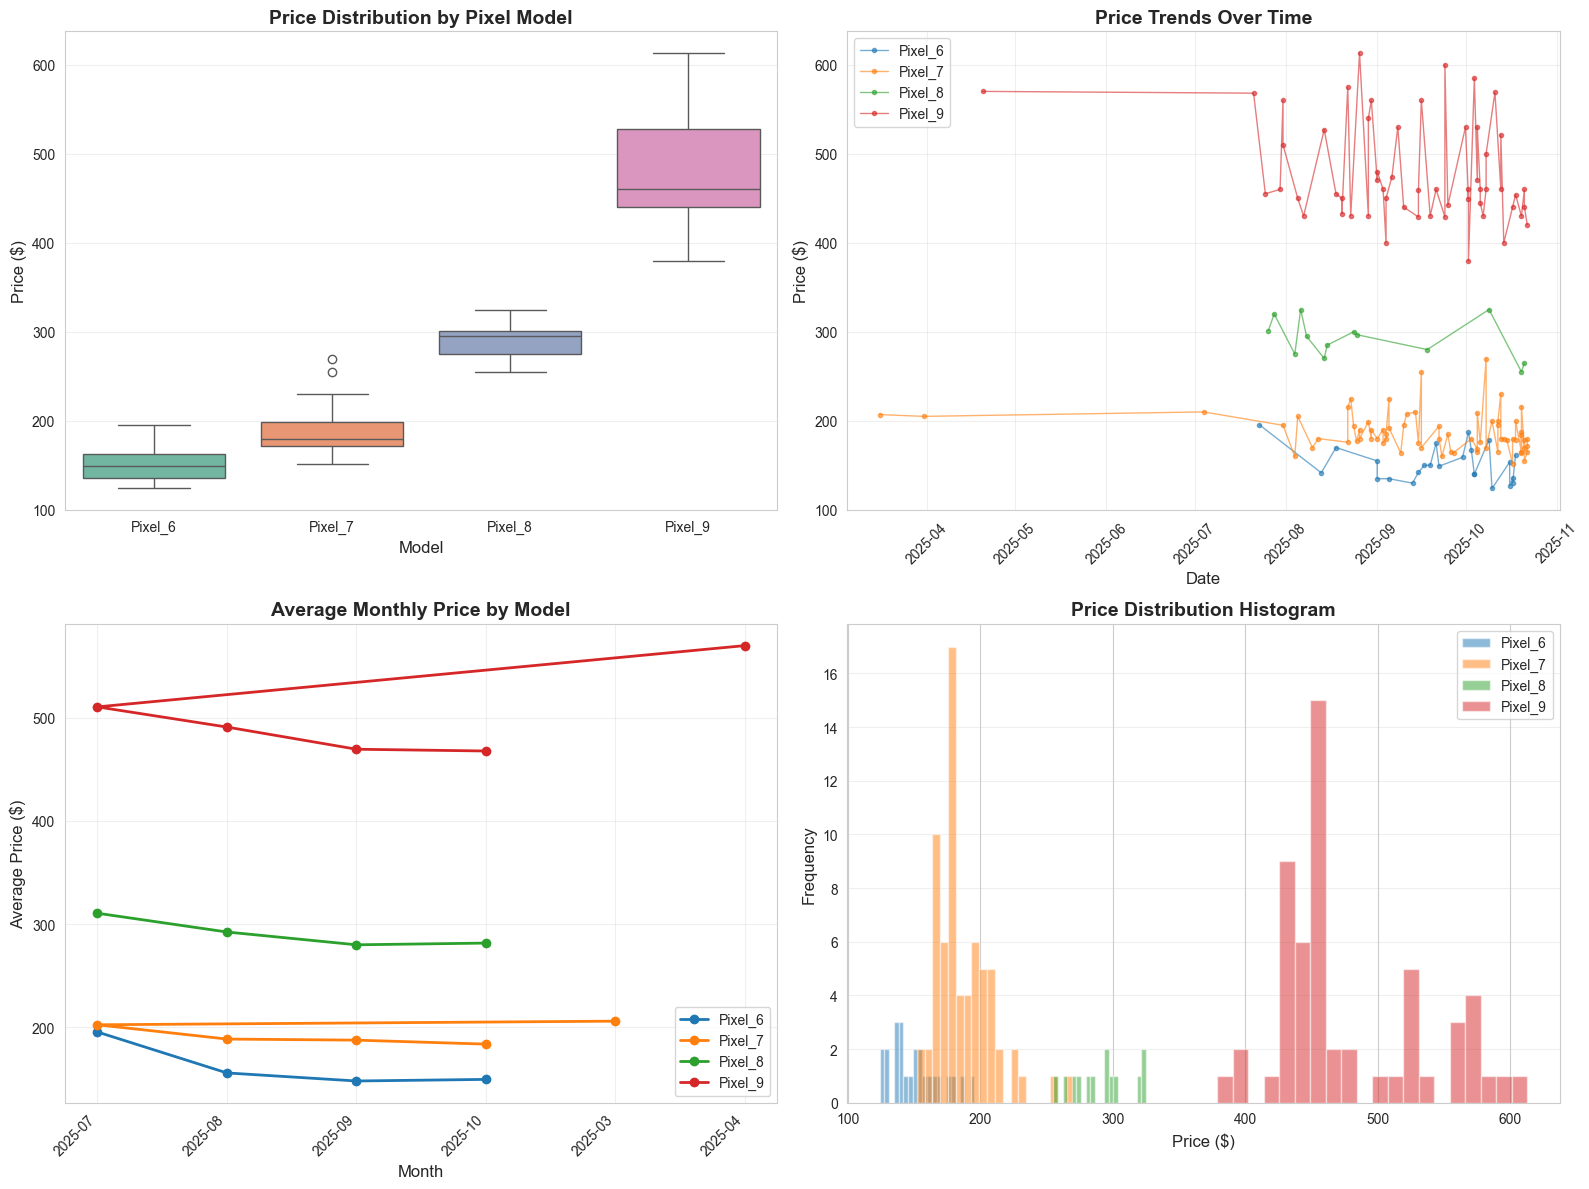

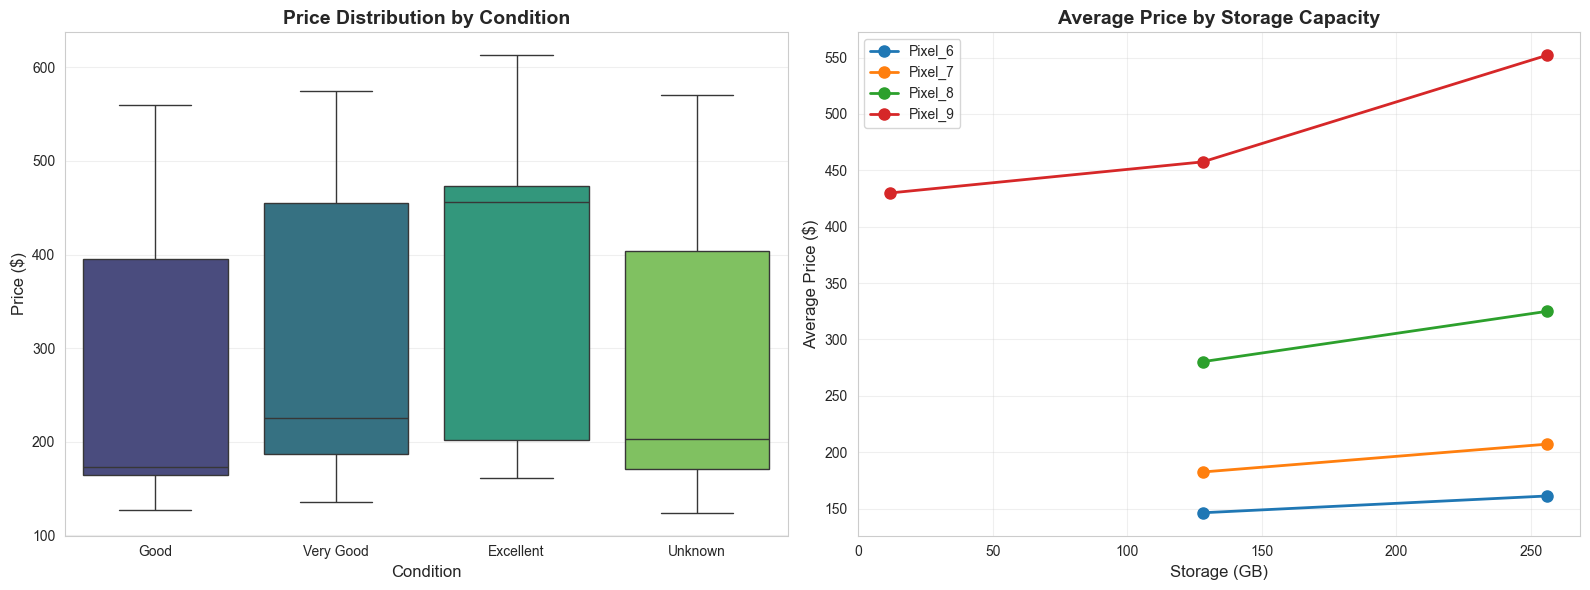

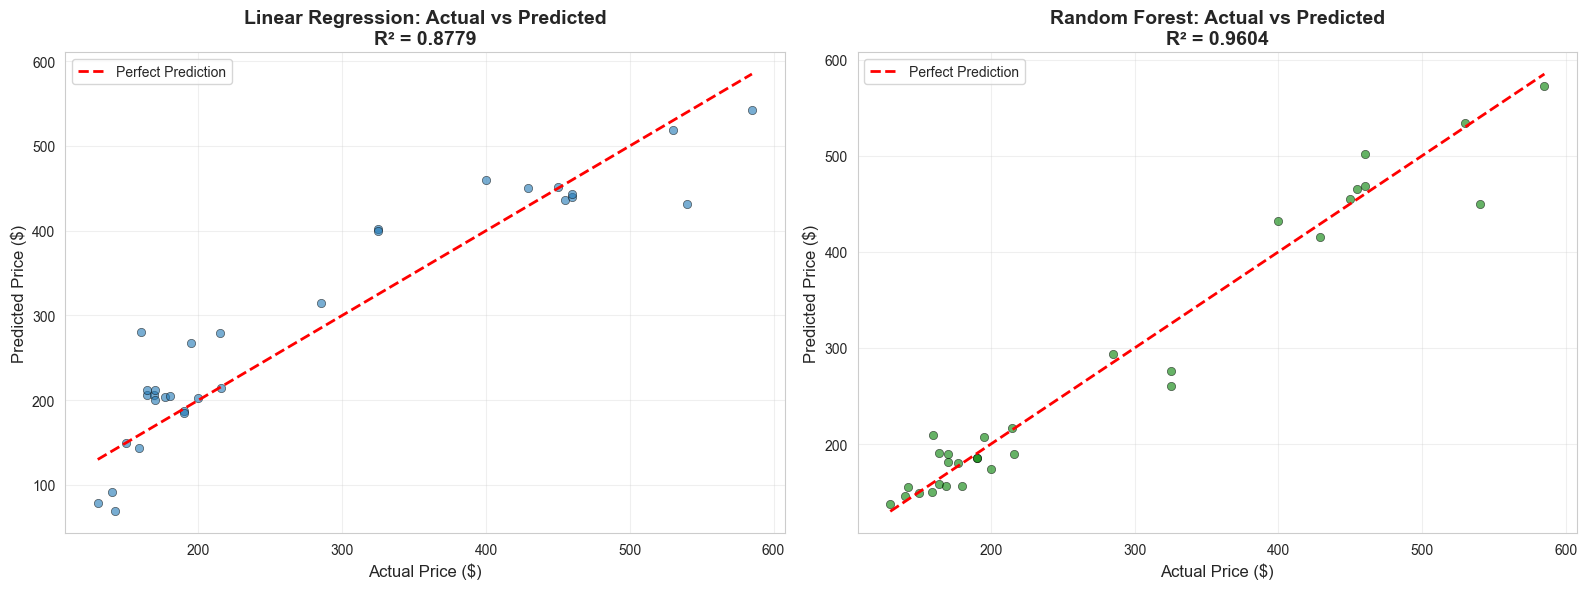

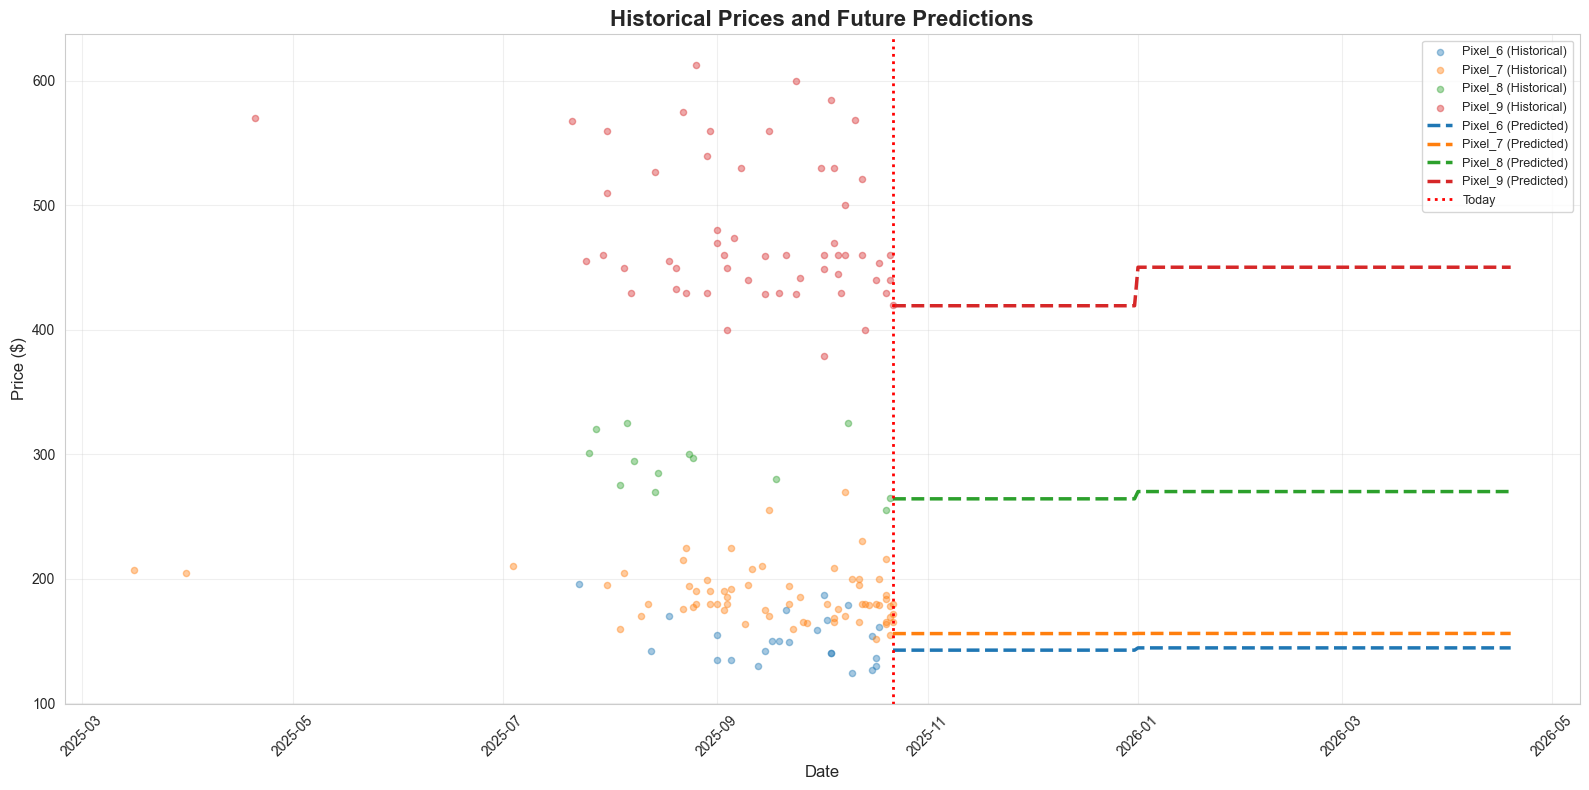

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Prepare paths
p = Path.cwd()
outputs_dir = p / 'outputs'
outputs_dir.mkdir(parents=True, exist_ok=True)

# Load the data (robust): if pixel_base.csv missing, try to build it from component CSVs
print("Loading data...")
base_csv = p / 'pixel_base.csv'
if not base_csv.exists():
    print("pixel_base.csv not found. Attempting to build it from component CSVs...")
    component_names = ['pixel_6_only.csv', 'pixel_7_only.csv', 'pixel_8_only.csv', 'pixel_9_only.csv', 'pixel_10_only.csv']
    component_paths = [p / name for name in component_names]
    existing_components = [c for c in component_paths if c.exists()]
    if not existing_components:
        raise FileNotFoundError(
            f"Missing pixel_base.csv and no component CSVs found in {p}. "
            f"Looked for: {component_names}"
        )
    dfs = []
    for c in existing_components:
        try:
            print(f"  Reading {c.name}...")
            dfs.append(pd.read_csv(c))
        except Exception as e:
            print(f"  Warning: failed to read {c.name}: {e}")
    if not dfs:
        raise FileNotFoundError("No readable component CSVs to build pixel_base.csv")
    pixel_base_df = pd.concat(dfs, ignore_index=True)
    pixel_base_df.to_csv(base_csv, index=False)
    print(f"Built and saved {base_csv}")

df = pd.read_csv(base_csv)

# Data Preprocessing
print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Convert Price column to numeric (remove $ and convert to float)
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert Sold Date to datetime
df['Sold Date'] = pd.to_datetime(df['Sold Date'])

# Extract year and month for analysis
df['Year'] = df['Sold Date'].dt.year
df['Month'] = df['Sold Date'].dt.month
df['YearMonth'] = df['Sold Date'].dt.to_period('M')

# Clean Storage column
df['Storage_Clean'] = df['Storage'].str.extract('(\\d+)').astype(float)

# Create a unified model identifier
df['Model_Clean'] = df['Model'].str.replace(' ', '_')

print(f"\nDataset shape: {df.shape}")
print(f"Date range: {df['Sold Date'].min()} to {df['Sold Date'].max()}")
print(f"\nModels in dataset:")
print(df['Model_Clean'].value_counts())

# ============================================================================
# VISUALIZATION 1: Price Distribution by Model
# ============================================================================
print("\n\nCreating visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Box plot of prices by model
ax1 = axes[0, 0]
model_order = ['Pixel_6', 'Pixel_7', 'Pixel_8', 'Pixel_9']
available_models = [m for m in model_order if m in df['Model_Clean'].unique()]
sns.boxplot(data=df[df['Model_Clean'].isin(available_models)], 
            x='Model_Clean', y='Price', order=available_models, ax=ax1, palette='Set2')
ax1.set_title('Price Distribution by Pixel Model', fontsize=14, fontweight='bold')
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Price trends over time
ax2 = axes[0, 1]
for model in available_models:
    model_data = df[df['Model_Clean'] == model].sort_values('Sold Date')
    ax2.plot(model_data['Sold Date'], model_data['Price'], 
             marker='o', alpha=0.6, label=model, linewidth=1, markersize=3)
ax2.set_title('Price Trends Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Plot 3: Average monthly price by model
ax3 = axes[1, 0]
monthly_avg = df.groupby(['YearMonth', 'Model_Clean'])['Price'].mean().reset_index()
for model in available_models:
    model_monthly = monthly_avg[monthly_avg['Model_Clean'] == model]
    ax3.plot(model_monthly['YearMonth'].astype(str), model_monthly['Price'], 
             marker='o', label=model, linewidth=2, markersize=6)
ax3.set_title('Average Monthly Price by Model', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month', fontsize=12)
ax3.set_ylabel('Average Price ($)', fontsize=12)
ax3.legend()
ax3.grid(alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: Histogram of all prices
ax4 = axes[1, 1]
for model in available_models:
    model_data = df[df['Model_Clean'] == model]
    ax4.hist(model_data['Price'], bins=20, alpha=0.5, label=model)
ax4.set_title('Price Distribution Histogram', fontsize=14, fontweight='bold')
ax4.set_xlabel('Price ($)', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(outputs_dir / 'price_distribution_analysis.png', dpi=300, bbox_inches='tight')
print("\u2713 Saved:", outputs_dir / 'price_distribution_analysis.png')

# ============================================================================
# VISUALIZATION 2: Condition and Storage Analysis
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Price by Condition
ax1 = axes[0]
condition_order = ['Good', 'Very Good', 'Excellent', 'Unknown']
available_conditions = [c for c in condition_order if c in df['Condition'].unique()]
df_condition = df[df['Condition'].isin(available_conditions)]
sns.boxplot(data=df_condition, x='Condition', y='Price', 
            order=available_conditions, ax=ax1, palette='viridis')
ax1.set_title('Price Distribution by Condition', fontsize=14, fontweight='bold')
ax1.set_xlabel('Condition', fontsize=12)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Price by Storage
ax2 = axes[1]
df_storage = df[df['Storage_Clean'].notna()]
storage_values = sorted(df_storage['Storage_Clean'].unique())
for model in available_models:
    model_storage = df_storage[df_storage['Model_Clean'] == model].groupby('Storage_Clean')['Price'].mean()
    ax2.plot(model_storage.index, model_storage.values, 
             marker='o', label=model, linewidth=2, markersize=8)
ax2.set_title('Average Price by Storage Capacity', fontsize=14, fontweight='bold')
ax2.set_xlabel('Storage (GB)', fontsize=12)
ax2.set_ylabel('Average Price ($)', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(outputs_dir / 'condition_storage_analysis.png', dpi=300, bbox_inches='tight')
print("\u2713 Saved:", outputs_dir / 'condition_storage_analysis.png')

# ============================================================================
# PREDICTIVE MODELING
# ============================================================================
print("\n" + "="*80)
print("BUILDING PREDICTIVE MODELS")
print("="*80)

# Prepare data for modeling
df_model = df.copy()

# Encode categorical variables
le_condition = LabelEncoder()
le_model = LabelEncoder()

df_model['Condition_Encoded'] = le_condition.fit_transform(df_model['Condition'])
df_model['Model_Encoded'] = le_model.fit_transform(df_model['Model_Clean'])

# Create time-based features
df_model['Days_Since_Start'] = (df_model['Sold Date'] - df_model['Sold Date'].min()).dt.days
df_model['Month_Num'] = df_model['Month']
df_model['Year_Num'] = df_model['Year']

# Select features for prediction
feature_columns = ['Model_Encoded', 'Storage_Clean', 'Condition_Encoded', 
                   'Days_Since_Start', 'Month_Num', 'Year_Num']

# Remove rows with missing values in feature columns
df_model_clean = df_model.dropna(subset=feature_columns + ['Price'])

X = df_model_clean[feature_columns]
y = df_model_clean['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Models
print("\nTraining models...")

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("\nLinear Regression Results:")
print(f"  Mean Absolute Error: ${lr_mae:.2f}")
print(f"  Root Mean Squared Error: ${lr_rmse:.2f}")
print(f"  R² Score: ${lr_r2:.4f}")

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Results:")
print(f"  Mean Absolute Error: ${rf_mae:.2f}")
print(f"  Root Mean Squared Error: ${rf_rmse:.2f}")
print(f"  R² Score: ${rf_r2:.4f}")

# Feature Importance
print("\nFeature Importance (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.to_string(index=False))

# ============================================================================
# VISUALIZATION 3: Model Performance
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Linear Regression - Actual vs Predicted
ax1 = axes[0]
ax1.scatter(y_test, lr_predictions, alpha=0.6, edgecolors='k', linewidth=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax1.set_title(f'Linear Regression: Actual vs Predicted\nR² = {lr_r2:.4f}', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Price ($)', fontsize=12)
ax1.set_ylabel('Predicted Price ($)', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Random Forest - Actual vs Predicted
ax2 = axes[1]
ax2.scatter(y_test, rf_predictions, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax2.set_title(f'Random Forest: Actual vs Predicted\nR² = {rf_r2:.4f}', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Actual Price ($)', fontsize=12)
ax2.set_ylabel('Predicted Price ($)', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(outputs_dir / 'model_performance.png', dpi=300, bbox_inches='tight')
print("\n\u2713 Saved:", outputs_dir / 'model_performance.png')

# ============================================================================
# FUTURE PRICE PREDICTIONS
# ============================================================================
print("\n" + "="*80)
print("FUTURE PRICE PREDICTIONS")
print("="*80)

# Create future dates for prediction (next 6 months)
last_date = df['Sold Date'].max()
future_dates = pd.date_range(start=last_date, periods=180, freq='D')

# Function to predict future prices for each model
def predict_future_prices(model_name, storage=128, condition='Good'):
    model_encoded = le_model.transform([model_name])[0]
    condition_encoded = le_condition.transform([condition])[0]
    
    predictions = []
    for date in future_dates:
        days_since_start = (date - df['Sold Date'].min()).days
        month = date.month
        year = date.year
        
        X_future = np.array([[model_encoded, storage, condition_encoded, 
                             days_since_start, month, year]])
        
        pred_price = rf_model.predict(X_future)[0]
        predictions.append({
            'Date': date,
            'Model': model_name,
            'Predicted_Price': pred_price
        })
    
    return pd.DataFrame(predictions)

# Generate predictions for each model
print("\nGenerating future price predictions...")
future_predictions = []

for model in available_models:
    print(f"  Predicting for {model}...")
    future_pred = predict_future_prices(model, storage=128, condition='Good')
    future_predictions.append(future_pred)

future_df = pd.concat(future_predictions, ignore_index=True)

# ============================================================================
# VISUALIZATION 4: Future Price Predictions
# ============================================================================
fig, ax = plt.subplots(figsize=(16, 8))

# Plot historical data
for model in available_models:
    historical = df[df['Model_Clean'] == model].sort_values('Sold Date')
    ax.scatter(historical['Sold Date'], historical['Price'], 
              alpha=0.4, s=20, label=f'{model} (Historical)')

# Plot future predictions
for model in available_models:
    future = future_df[future_df['Model'] == model]
    ax.plot(future['Date'], future['Predicted_Price'], 
           linewidth=2.5, linestyle='--', label=f'{model} (Predicted)')

ax.axvline(x=last_date, color='red', linestyle=':', linewidth=2, label='Today')
ax.set_title('Historical Prices and Future Predictions', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='best', fontsize=9)
ax.grid(alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.savefig(outputs_dir / 'future_predictions.png', dpi=300, bbox_inches='tight')
print("\n\u2713 Saved:", outputs_dir / 'future_predictions.png')

# Save predictions to CSV
future_df.to_csv(outputs_dir / 'future_price_predictions.csv', index=False)
print("\u2713 Saved:", outputs_dir / 'future_price_predictions.csv')

# ============================================================================
# SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

print("\nKey Findings:")
print("-" * 80)

for model in available_models:
    model_data = df[df['Model_Clean'] == model]
    future_model = future_df[future_df['Model'] == model]
    
    current_avg = model_data['Price'].mean()
    future_avg = future_model['Predicted_Price'].mean()
    if current_avg and not np.isnan(current_avg):
        price_change = ((future_avg - current_avg) / current_avg) * 100
    else:
        price_change = np.nan
    
    print(f"\n{model}:")
    print(f"  Current Average Price: ${current_avg:.2f}")
    print(f"  Predicted 6-Month Average: ${future_avg:.2f}")
    print(f"  Expected Price Change: {price_change:+.2f}%")
    
    # Calculate depreciation rate
    if len(model_data) > 1:
        model_sorted = model_data.sort_values('Sold Date')
        days_range = (model_sorted['Sold Date'].max() - model_sorted['Sold Date'].min()).days
        if days_range > 0:
            price_start = model_sorted.iloc[0]['Price']
            price_end = model_sorted.iloc[-1]['Price']
            daily_depreciation = ((price_end - price_start) / price_start) / days_range * 100
            print(f"  Daily Depreciation Rate: {daily_depreciation:.4f}%")

print("\n" + "="*80)
print("Analysis complete! Check the output folder for visualizations.")
print("="*80)

# Create a summary statistics DataFrame
summary_stats = []
for model in available_models:
    model_data = df[df['Model_Clean'] == model]
    summary_stats.append({
        'Model': model,
        'Count': len(model_data),
        'Mean_Price': model_data['Price'].mean(),
        'Median_Price': model_data['Price'].median(),
        'Std_Dev': model_data['Price'].std(),
        'Min_Price': model_data['Price'].min(),
        'Max_Price': model_data['Price'].max()
    })

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv(outputs_dir / 'summary_statistics.csv', index=False)
print("\n\u2713 Saved:", outputs_dir / 'summary_statistics.csv')

print("\n🎉 All outputs saved to", outputs_dir)

Initializing Pixel Price Predictor...



FileNotFoundError: Model file not found at /mnt/user-data/outputs/pixel_price_model.pkl. Please run train_model.py first to create the model.